In [1]:
# Import all the important python libraries

import pandas                                               #Data processing
from pandas.plotting import scatter_matrix                  #Data visualization
import matplotlib.pyplot as plt                             #Plotting the data

# ML Libraries
from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB       #One type of Naive bayes
from sklearn.svm import SVC                                     #One type of SVM

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
# Iris flowers dataset, commonly used as the "Hello World" dataset in Machine Learning
#The dataset contains 150 observations of iris flowers. 
#There are four columns of measurements of the flowers in centimeters. 
#The fifth column is the species (Classes = 3) of the flower observed. All observed flowers belong to one of three species.


url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']      # "features"for our classfication problem
dataset = pandas.read_csv(url, names=names)

# Summarising the Dataset - "Exploratory Data Analysis"


In [3]:
# Dimensions of the dataset
print(dataset.shape)

(150, 5)


In [4]:
# View sample data to get a general sense - top 5 entries

print(dataset.head(5))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
# Statistical Summary

print(dataset.describe())
#count - total number, mean - mean of all the values, std - standard deviation, min - minimum value, max - maximum values
#25%, 50%, 75% - percentile values

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
# Class distribution

print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Data Visualization

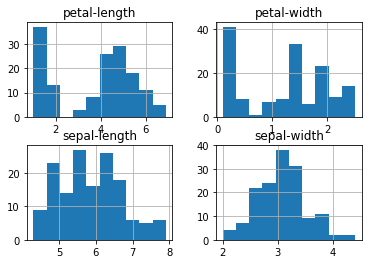

In [7]:
# Histogram of each input variable to get an idea of the distribution

dataset.hist()
plt.show()

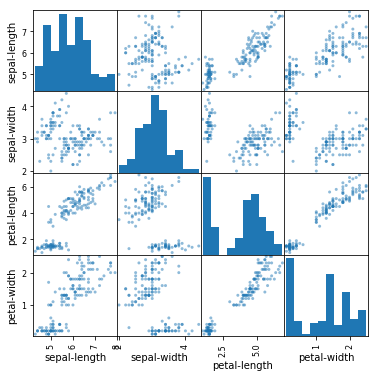

In [8]:
# Multivariate Plots
#let’s look at scatterplots of all pairs of attributes. 
#This can be helpful to spot structured relationships between input variables.

scatter_matrix(dataset,  figsize=(6,6))
plt.show()

# Creating Validation and Testing Dataset

In [9]:
#We will split the loaded dataset into three:
#80% of which we will use to train our models
#10% that we will hold back as a validation dataset
#10% that we will use to test the model


array = dataset.values
X = array[:,0:4]
Y = array[:,4] #Class
seed = 7

#Getting 20% data out for validation and testing purpose
X_train, X_testGrp, Y_train, Y_testGrp = model_selection.train_test_split(X, Y, test_size=0.20, random_state=seed)

#Dividing that 20% into 10% for validation and 10% for testing
X_validation, X_test, Y_validation, Y_test = model_selection.train_test_split(X_testGrp, Y_testGrp, test_size=0.50, random_state=seed)

# Build Models

### 1. Logistic Regression

In [10]:
LR_model = LogisticRegression()
#train the algorithm on training data and predict using the validation data
pred_LR = LR_model.fit(X_train, Y_train).predict(X_validation)
#print the accuracy score of the model
print("Logistic Regression accuracy score: ",accuracy_score(Y_validation, pred_LR))

Logistic Regression accuracy score:  0.8


### 2. K Nearest Neighbors

In [20]:
KNN_model = KNeighborsClassifier(n_neighbors = 4) #default: k = 5
#train the algorithm on training data and predict using the validation data
pred_KNN = KNN_model.fit(X_train, Y_train).predict(X_validation)
#print the accuracy score of the model
print("KNeighbors accuracy score: ",accuracy_score(Y_validation, pred_KNN))

KNeighbors accuracy score:  0.8666666666666667


### 3. Decision Tree Classifier

In [12]:
DT_model = DecisionTreeClassifier()
#train the algorithm on training data and predict using the validation data
pred_DT = DT_model.fit(X_train, Y_train).predict(X_validation)
#print the accuracy score of the model
print("Decision Tree Classifier accuracy score: ",accuracy_score(Y_validation, pred_DT))

Decision Tree Classifier accuracy score:  0.8


### 4. Naive Bayes Classifier

In [13]:
NB_model = GaussianNB()
#train the algorithm on training data and predict using the validation data
pred_NB = NB_model.fit(X_train, Y_train).predict(X_validation)
#print the accuracy score of the model
print("Naive Bayes Classifier accuracy score: ",accuracy_score(Y_validation, pred_NB))

Naive Bayes Classifier accuracy score:  0.6666666666666666


### 5. Support Vector Machine

In [14]:
SVC_model = SVC() #default: kernel - rbf
#train the algorithm on training data and predict using the validation data
pred_SVC = SVC_model.fit(X_train, Y_train).predict(X_validation)
#print the accuracy score of the model
print("SVM accuracy score: ",accuracy_score(Y_validation, pred_SVC))

SVM accuracy score:  0.8666666666666667


### 6. Support Vector Machine  - kernel = linear (hyperparameter)

In [15]:
SVC_model = SVC(kernel='linear')
#train the algorithm on training data and predict using the validation data
pred_SVC = SVC_model.fit(X_train, Y_train).predict(X_validation)
#print the accuracy score of the model
print("SVM-linear accuracy score: ",accuracy_score(Y_validation, pred_SVC))

SVM-linear accuracy score:  0.9333333333333333


### 7. Support Vector Machine  - kernel = poly (hyperparameter)

In [16]:
SVC_model = SVC(kernel='poly')
#train the algorithm on training data and predict using the validation data
pred_SVC = SVC_model.fit(X_train, Y_train).predict(X_validation)
#print the accuracy score of the model
print("SVM-linear accuracy score: ",accuracy_score(Y_validation, pred_SVC))

SVM-linear accuracy score:  0.6666666666666666


# Select the best model for our testing dataset and make our predictions


In [17]:
SVC_model = SVC(kernel='linear')
#train the algorithm on training data and predict using the validation data
pred_SVC = SVC_model.fit(X_train, Y_train).predict(X_test)
#print the accuracy score of the model
print("SVM-linear accuracy score: ",accuracy_score(Y_test, pred_SVC))

SVM-linear accuracy score:  1.0


In [18]:

print(confusion_matrix(Y_test, pred_SVC))

[[4 0 0]
 [0 4 0]
 [0 0 7]]
